In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
import pwd

In [44]:

sns.set_theme(style="darkgrid")

### Convert to CSV file

In [28]:
times = []
files = os.listdir("results")
for file_path in files:
    path = os.path.join("results", file_path)
    epochs = []
    train_losses = []
    train_accuracies = []
    test_losses = []
    test_accuracies = []

    # Wczytywanie danych z pliku
    with open(path, 'r') as file:
        for line in file:
            if line.startswith('Epoch'):
                # Rozdzielenie linii na części
                parts = line.split('|')
                epoch = int(parts[0].split(':')[1].strip())
                train_loss = float(parts[1].split(':')[1].strip())
                train_acc = float(parts[2].split(':')[1].strip())
                test_loss = float(parts[3].split(':')[1].strip())
                test_acc = float(parts[4].split(':')[1].strip())

                # Dodawanie danych do list
                epochs.append(epoch)
                train_losses.append(train_loss)
                train_accuracies.append(train_acc)
                test_losses.append(test_loss)
                test_accuracies.append(test_acc)
            if line.startswith("Total training time:"):
                time = float()

    # Tworzenie DataFrame z danych
    data = {
        'Epoch': epochs,
        'train_loss': train_losses,
        'train_acc': train_accuracies,
        'test_loss': test_losses,
        'test_acc': test_accuracies
    }

    df = pd.DataFrame(data)
    result_path = os.path.join("results", str(file_path).split(sep=".")[0] + ".csv")
    df.to_csv(result_path, sep=";", index=False)


In [49]:
files = [[1, "results1.csv"], [2, "results2.csv"], [4, "results4.csv"], [16, "results16.csv"], [32, "results32.csv"], [64, "results64.csv"], [128, "results128.csv"]]

In [51]:
main_df = pd.DataFrame(columns=["Epoch", "train_loss", "train_acc", "test_loss", "test_acc", "batch_size"])
for batch_size, file in files:
    df = pd.read_csv(os.path.join("results", file), sep=";")
    df["batch_size"] = batch_size
    main_df = pd.concat([main_df, df], ignore_index=True)

/tmp/ipykernel_6085/2953731519.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  main_df = pd.concat([main_df, df], ignore_index=True)


In [55]:
main_df.to_csv("results/concatResults.csv", sep=";", index=False)

In [ ]:

palette = {1: "blue", 2: "orange", 4: "green", 16: "red", 32: "purple", 64: "brown", 128: "pink"}

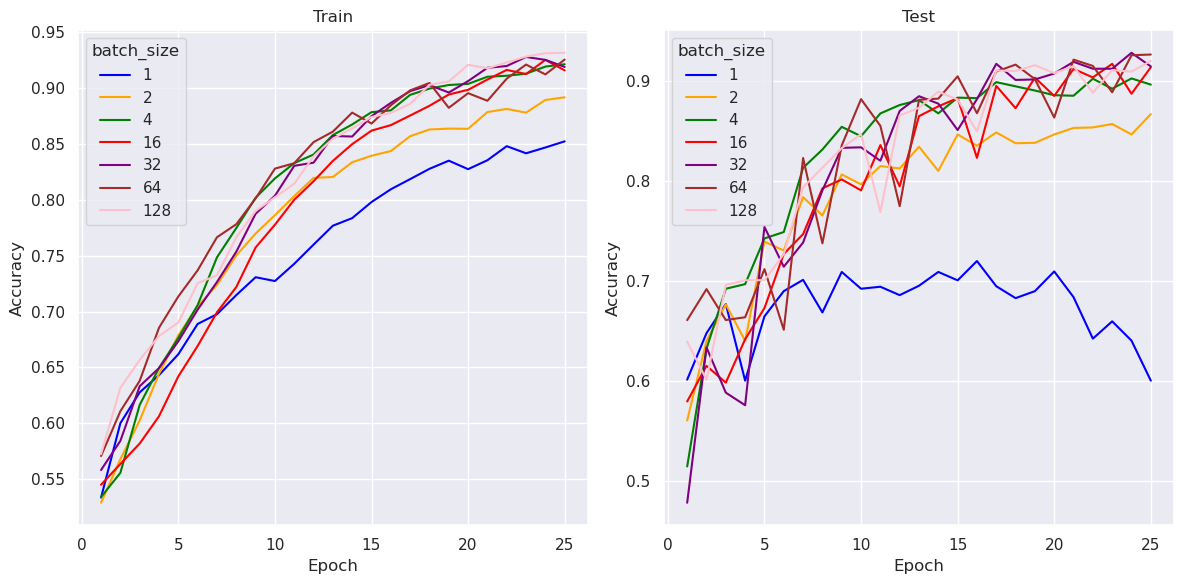

In [101]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(ax=axs[0], data=main_df, x="Epoch", y="train_acc", hue="batch_size",  markers=True, palette=palette)

axs[0].set_title('Train')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].grid(True)

sns.lineplot(ax=axs[1], data=main_df, x="Epoch", y="test_acc", hue="batch_size",  markers=True, palette=palette)

axs[1].set_title('Test')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("plots/Acc.png", dpi=300, bbox_inches="tight")
plt.show()


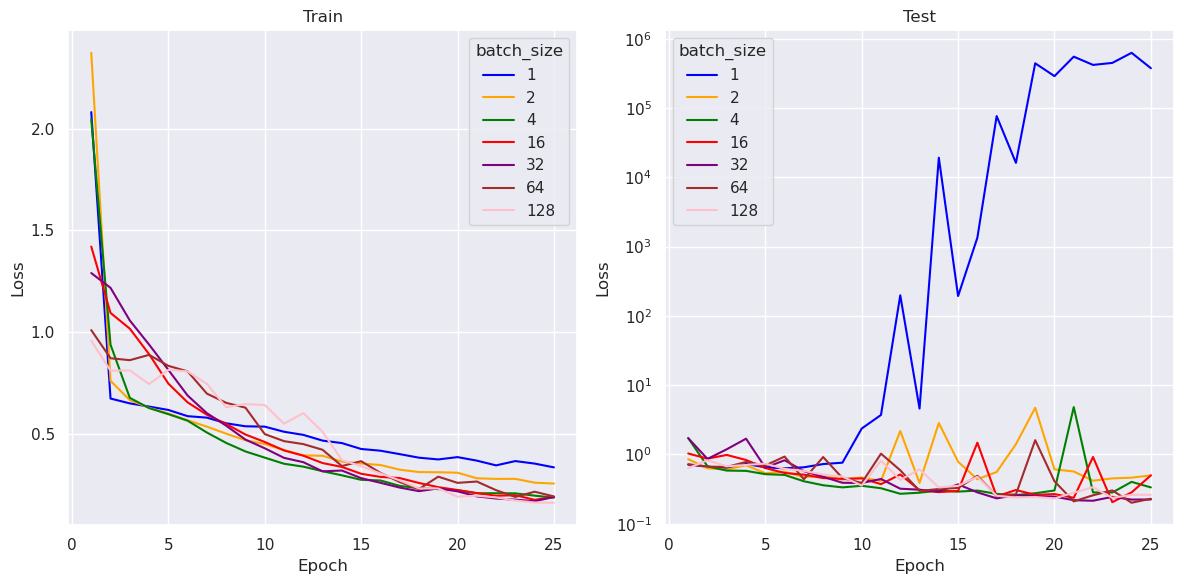

In [102]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(ax=axs[0], data=main_df, x="Epoch", y="train_loss", hue="batch_size",  markers=True, palette=palette)

axs[0].set_title('Train')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].grid(True)

sns.lineplot(ax=axs[1], data=main_df, x="Epoch", y="test_loss", hue="batch_size",  markers=True, palette=palette)

axs[1].set_yscale("log")
axs[1].set_title('Test')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].grid(True)

plt.tight_layout()
plt.savefig("plots/Loss.png", dpi=300, bbox_inches="tight")
plt.show()


### Plot training time

In [30]:
time_df = pd.read_csv("results/timeResults.csv", sep=";")

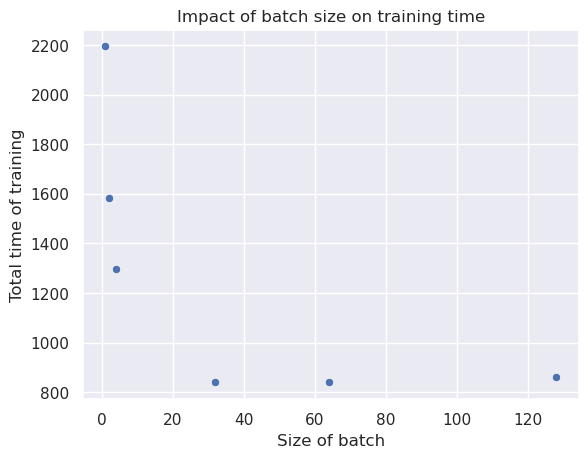

In [48]:
sns.scatterplot(x="Batch_size", y="Training_time", data=time_df)
plt.title("Impact of batch size on training time")

plt.xlabel("Size of batch")
plt.ylabel("Total time of training")
plt.grid(True)

plt.savefig("plots/TotalTimeFig.png", dpi=300, bbox_inches="tight")

plt.show()